<a href="https://colab.research.google.com/github/lrincon66/Computational_chemistry/blob/main/genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [28]:
def fun(N,X):
  sum = 0.0
  for i in range(N):
    sum = sum + X[i]
  return sum

In [29]:
# Initialization
N = 1000 # number of gene of each individual
M = 100  # number of individual
X = np.zeros((M,N),dtype='int')
random.seed()
for i in range(M):
  for j in range(N):
    if random.random()>0.5:
      X[i,j] = 1

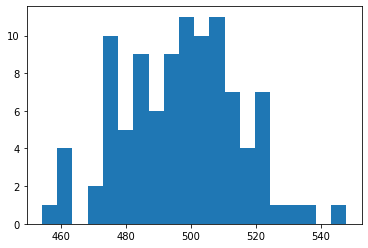

In [30]:
# plot the distirbution
dist = np.zeros(M)
for i in range(M):
  dist[i] = fun(N,X[i,:])
plt.hist(dist,bins=20)
plt.show()

In [31]:
#crossover
def crossover(N,XP,XM):
  gcut = random.randint(1,N-2)
  XS = np.zeros(N)
  for i in range(gcut):
    XS[i] = XP[i]
  for i in range(gcut+1,N-1):
    XS[i] = XM[i]
  XD = np.zeros(N)
  for i in range(gcut):
    XD[i] = XM[i]
  for i in range(gcut+1,N-1):
    XD[i] = XP[i]
  FP = fun(N,XP)
  FM = fun(N,XM)
  FS = fun(N,XS)
  FD = fun(N,XD)
  if FP<FM and FP<FS and FP<FD:
     return XP
  if FM<=FP and FM<FS and FM<FD:
     return XM
  if FS<=FM and FS<=FP and FS<=FD:
     return XS
  if FD<=FM and FD<FS and FD<=FP:
     return XD

In [32]:
#mutation
def mutation(N,X,prob):
   for i in range(N):
     if prob>random.random():
       if X[i]==0:
         X[i]=1
       else:
         X[i]=0
   return X

In [33]:
# selection of the parents
def select(N,M,X):
  sample_list = []
  for i in range(M):
    sample_list.append(i)
  weights = np.zeros(M)
  for i in range(M):
      weights[i] = np.abs(1000-fun(N,X[i,:]))
  suma = np.sum(weights)
  weights = weights/suma
  # select the father
  father = random.choices(sample_list,weights=weights)
  mother = random.choices(sample_list,weights=weights)
  return father,mother

In [34]:
# main loop
gen = []
min = []
max = []
mean = []
for i in range(500):    # number of generations
    # calculate the probability of each parent
    newX = np.zeros((M,N))
    ene = np.zeros(M)
    for j in range(M):
       father, mother = select(N,M,X)
       XP = np.zeros(N)
       for k in range(N):
         XP[k] = X[father,k]
       XM = np.zeros(N)
       for k in range(N):
         XM[k] = X[mother,k]
       XX = crossover(N,XP,XM)
       XX = mutation(N,XX,0.0001)
       for k in range(N):
         newX[j,k] = XX[k]
       ene[j] = fun(N,XX)
    X = newX
    gen.append(i)
    min.append(np.min(ene))
    max.append(np.min(ene))
    mean.append(np.mean(ene))
    print(i,np.min(ene),np.max(ene),np.mean(ene))

0 453.0 513.0 482.54
1 446.0 498.0 473.43
2 436.0 486.0 464.64
3 431.0 479.0 455.75
4 417.0 467.0 447.54
5 416.0 455.0 441.09
6 410.0 454.0 433.8
7 410.0 448.0 425.52
8 402.0 434.0 417.95
9 391.0 430.0 410.09
10 389.0 425.0 403.17
11 382.0 409.0 396.58
12 379.0 405.0 390.13
13 364.0 399.0 384.28
14 362.0 390.0 376.85
15 360.0 386.0 371.2
16 354.0 379.0 365.51
17 352.0 374.0 360.95
18 346.0 366.0 356.85
19 343.0 361.0 353.29
20 340.0 357.0 350.23
21 338.0 353.0 346.6
22 336.0 349.0 342.66
23 328.0 347.0 338.96
24 327.0 342.0 335.2
25 320.0 339.0 331.85
26 317.0 337.0 329.06
27 317.0 333.0 325.99
28 314.0 330.0 323.02
29 313.0 326.0 319.94
30 309.0 323.0 316.69
31 308.0 319.0 313.98
32 305.0 317.0 311.3
33 303.0 314.0 308.62
34 302.0 311.0 306.32
35 296.0 308.0 303.84
36 296.0 305.0 301.24
37 292.0 304.0 299.28
38 291.0 301.0 297.28
39 289.0 300.0 295.28
40 288.0 298.0 293.34
41 286.0 296.0 290.91
42 282.0 295.0 288.8
43 281.0 292.0 286.65
44 278.0 289.0 284.49
45 277.0 286.0 281.78
46 2

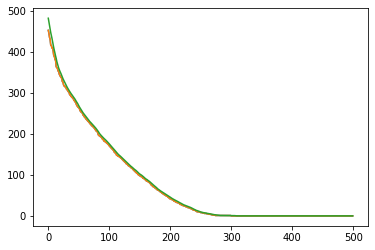

In [35]:
plt.plot(gen,min)
plt.plot(gen,max)
plt.plot(gen,mean)
plt.show()